In [92]:
from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt
from random import random
import scipy
from scipy.optimize import minimize

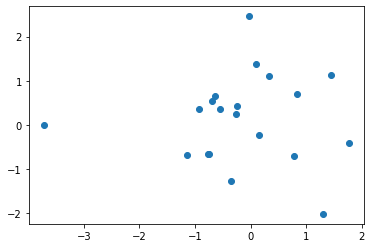

In [93]:
# Define the beacon locations (randomly located in the unit square)
n_nums = 20
x_beac = np.random.randn(n_nums)
y_beac = np.random.randn(n_nums)

plt.scatter(x_beac, y_beac)
plt.show()

In [94]:
def fun_bys(x, y):
    s = 0
    for i in range(n_nums):
        dx = x-x_beac[i]
        dy = y-y_beac[i]
        ss = np.sqrt(dx**2 + dy**2)
        s += ss
    return -s
    
def fun(x):
    s = 0
    for i in range(n_nums):
        dx = x[0]-x_beac[i]
        dy = x[1]-y_beac[i]
        ss = np.sqrt(dx**2 + dy**2)
        s += ss
    return s

## bys_opt

In [95]:
bys_opt = BayesianOptimization(f=fun_bys, pbounds={'x':(-10, 10), 'y':(-10, 10)})

In [96]:
bys_opt.maximize()

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -263.6    | -9.852    | -8.731    |
| 2         | -209.0    | 9.993     | 2.361     |
| 3         | -178.0    | 4.128     | -7.58     |
| 4         | -189.3    | -6.17     | 7.368     |
| 5         | -166.4    | -8.116    | -2.118    |
| 6         | -178.5    | 0.1578    | -8.704    |
| 7         | -148.2    | -7.509    | 0.4477    |
| 8         | -56.32    | -2.708    | -0.1859   |
| 9         | -30.37    | 0.1624    | 1.007     |
| 10        | -106.4    | 1.216     | 5.168     |
| 11        | -47.69    | 0.8647    | -1.673    |
| 12        | -56.9     | 2.412     | 0.6428    |
| 13        | -26.49    | -0.3074   | -0.1796   |
| 14        | -27.43    | -0.7184   | 0.5318    |
| 15        | -25.89    | 0.01973   | 0.1829    |
| 16        | -25.04    | -0.2797   | 0.2453    |
| 17        | -284.0    | 10.0      | 10.0      |
| 18        | -25.05    | -0.2989   | 0.2679    |


In [97]:
pred = list(bys_opt.max['params'].values())

25.03719237347388


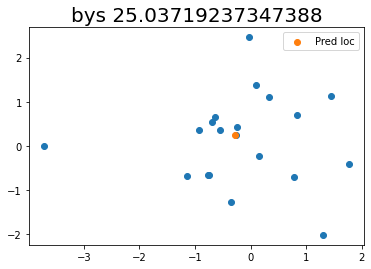

In [98]:
plt.scatter(x_beac, y_beac)
plt.scatter(pred[0], pred[1], label='Pred loc')
plt.legend()
plt.title('{} {}'.format('bys', -fun_bys(pred[0], pred[1])), fontsize=20)
print(-fun_bys(pred[0], pred[1]))
plt.show()

## scipy中的优化方法

25.02056679368751


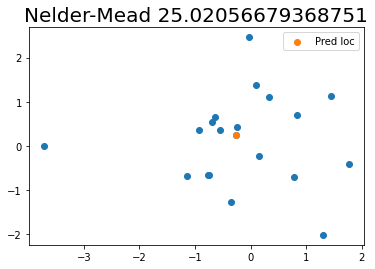

25.020579574871213


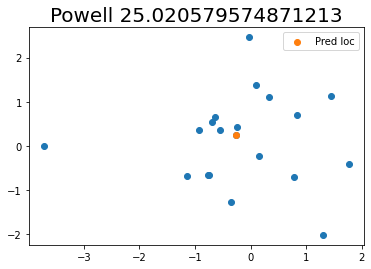

25.02053073804008


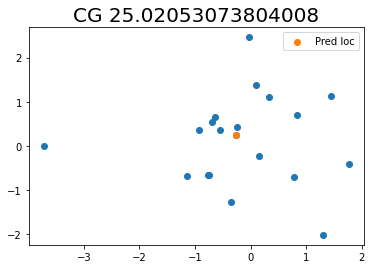

25.020530730688648


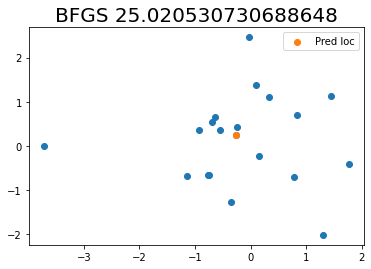

25.02053077783569


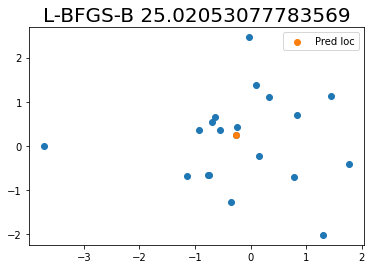

In [99]:
b_init = [0, 0]
method_list = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B']
for i in method_list:
    res = minimize(fun=fun, x0=b_init, method=i)
    plt.scatter(x_beac, y_beac)
    plt.scatter(res.x[0], res.x[1], label='Pred loc')
    plt.legend()
    plt.title('{} {}'.format(i, fun(res.x)), fontsize=20)
    print(fun(res.x))
    plt.show()